In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/operations/')

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
import pipeline_operations as po

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ROOT_DIRECTORY = '../../data/home-credit-default-risk'
print(os.listdir(ROOT_DIRECTORY))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
app_train = po.load_csv(ROOT_DIRECTORY + '/application_train.csv')
print('Training data shape: ', po.shape(app_train))
po.head(app_train)

('Training data shape: ', (307511, 122))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = po.load_csv(ROOT_DIRECTORY + '/application_test.csv')
print('Testing data shape: ', po.shape(app_test))
po.head(app_test)

('Testing data shape: ', (48744, 121))


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
po.value_counts(po.project('TARGET', app_train))

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = po.aggregate(sum, po.transform(pd.Series.isna, df))
    
    # Percentage of missing values
    mis_val_percent = po.transform(lambda x: x*100 / po.shape(df)[0], mis_val)
    
    return po.concat([mis_val, mis_val_percent])

In [7]:
missing_values = missing_values_table(app_train)
missing_values

,0,1
SK_ID_CURR,0,0
TARGET,0,0
NAME_CONTRACT_TYPE,0,0
CODE_GENDER,0,0
FLAG_OWN_CAR,0,0
FLAG_OWN_REALTY,0,0
CNT_CHILDREN,0,0
AMT_INCOME_TOTAL,0,0
AMT_CREDIT,0,0
AMT_ANNUITY,12,0


In [8]:
po.value_counts(po.dtypes(app_train))

float64    65
int64      41
object     16
dtype: int64

In [9]:
po.aggregate(pd.Series.nunique, app_train)

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
OWN_CAR_AGE                       62
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
F

In [10]:
po.aggregate(pd.Series.nunique, po.select_dtypes('object', app_train))

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train:
    if po.project(col, app_train).dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            model = po.fit_sklearn_model(le, po.project(col, app_train))
            po.set_column(po.apply_sklearn_model(model, po.project(col, app_train)), col, app_train)
            po.set_column(po.apply_sklearn_model(model, po.project(col, app_test)), col, app_test)
            
            # Keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
app_train = po.one_hot_encode(app_train)
app_test = po.one_hot_encode(app_test)

In [13]:
train_labels = po.project('TARGET', app_train)
app_train, app_test = po.align(app_train, app_test)
app_train = po.set_column(train_labels, 'TARGET', app_train)

In [14]:
po.aggregate(pd.Series.describe, po.transform(lambda x: x/-365,po.project('DAYS_BIRTH', app_train)))

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [15]:
po.aggregate(pd.Series.describe, po.project('DAYS_EMPLOYED', app_train))

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,u'Days Employment')

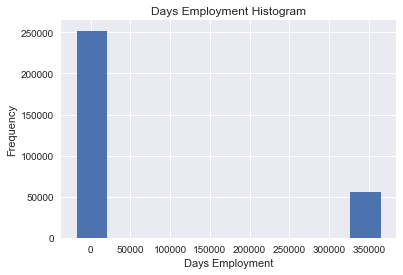

In [16]:
po.project('DAYS_EMPLOYED', app_train).plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [27]:
anom = po.filter_rows(365243, 'DAYS_EMPLOYED', '==', app_train)
non_anom = po.filter_rows(365243, 'DAYS_EMPLOYED', '!=', app_train)
print('The non-anomalies default on %0.2f%% of loans' % (100 * po.aggregate('mean', po.project('TARGET', non_anom))))
print('The anomalies default on %0.2f%% of loans' % (100 * po.aggregate('mean', po.project('TARGET', anom))))
print('There are %d anomalous days of employment' % po.shape(anom)[0])

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [31]:
app_train = po.set_column(po.transform(lambda x: np.nan if x == 365243 else x, po.project('DAYS_EMPLOYED',app_train)),
                                       'DAYS_EMPLOYED', app_train)
                          

Text(0.5,0,u'Days Employment')

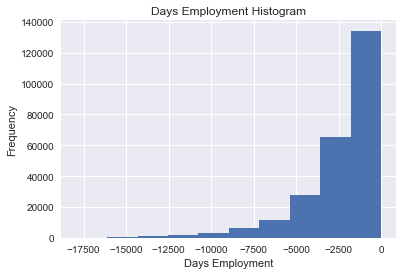

In [32]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')